*First compiled: October 3, 2017.*

# Monocle 2 for data of [Nestorowa *et al.*, Blood (2016)](https://doi.org/10.1182/blood-2016-05-716480)

In [1]:
suppressMessages(library(monocle))

## Load the data

In [2]:
df <- read.csv('./write/nestorowa16_171011_raw/X.csv', header=F)
df_anno <- read.csv('./write/nestorowa16_171011/smp.csv', header=T)
cds <- newCellDataSet(t(as.matrix(df)), phenoData = new("AnnotatedDataFrame", data = df_anno))

In [3]:
groups_colors <- as.vector(read.csv('./write/nestorowa16_171011/add/aga_groups_colors.csv', header=F)$V1)
groups_order <- as.vector(read.csv('./write/nestorowa16_171011/add/aga_groups_order.csv', header=F)$V1)
names(groups_colors) = groups_order

## Try with max_components = 10

In [4]:
previous_time <- proc.time()[3]
cds2 <- reduceDimension(cds, verbose = F, max_components = 10) 
cds2 <- orderCells(cds2)
proc.time()[3] - previous_time

Warning message in if (reduction_method == "DPT") {:
“the condition has length > 1 and only the first element will be used”

elapsed 
 91.681

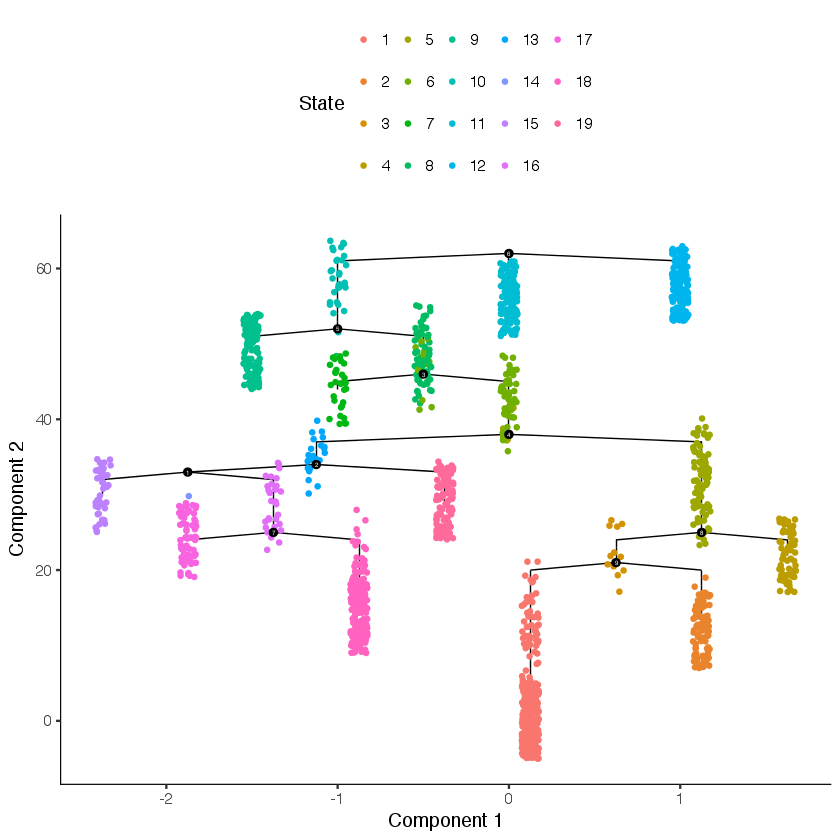

In [12]:
plot_complex_cell_trajectory(cds2, color_by = 'State', show_branch_points = T, 
                             cell_size = 0.8, cell_link_size = 0.3, root_states = c(3))

Choose the root state that best matches the stem cell cluster 18. It's state 3.

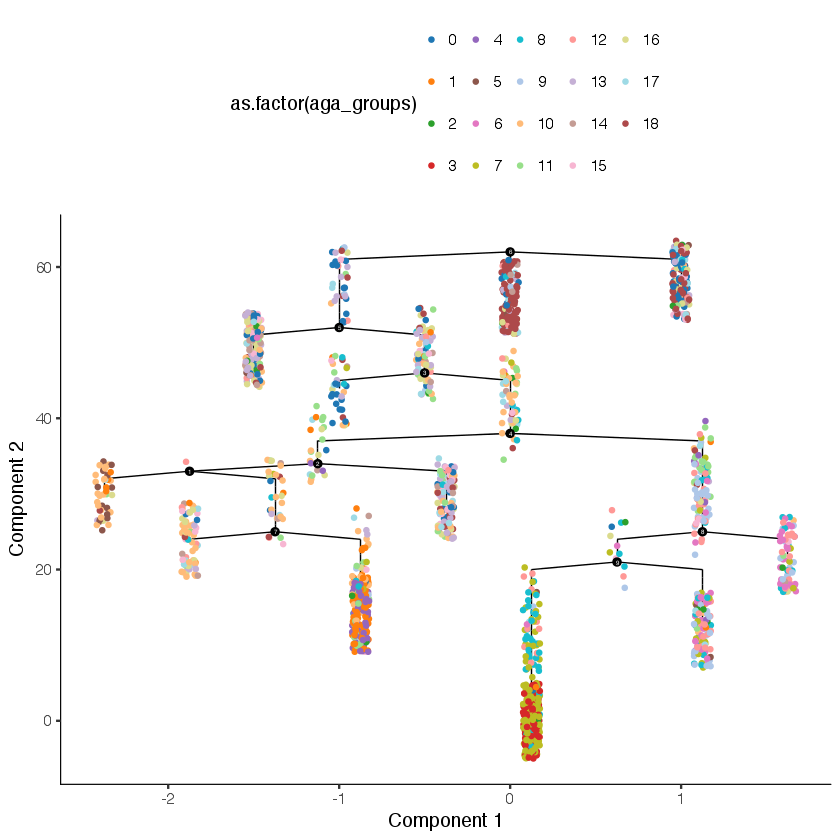

In [13]:
plot_complex_cell_trajectory(cds2, color_by = 'as.factor(aga_groups)', show_branch_points = T,
                             cell_size = 0.8, cell_link_size = 0.3, root_states = c(3)) + scale_color_manual(values = groups_colors)

## Try with max_components = 4

In [17]:
previous_time <- proc.time()[3]
cds3 <- reduceDimension(cds, verbose = F, max_components = 4) 
cds3 <- orderCells(cds2)
proc.time()[3] - previous_time

Warning message in if (reduction_method == "DPT") {:
“the condition has length > 1 and only the first element will be used”

elapsed 
180.568

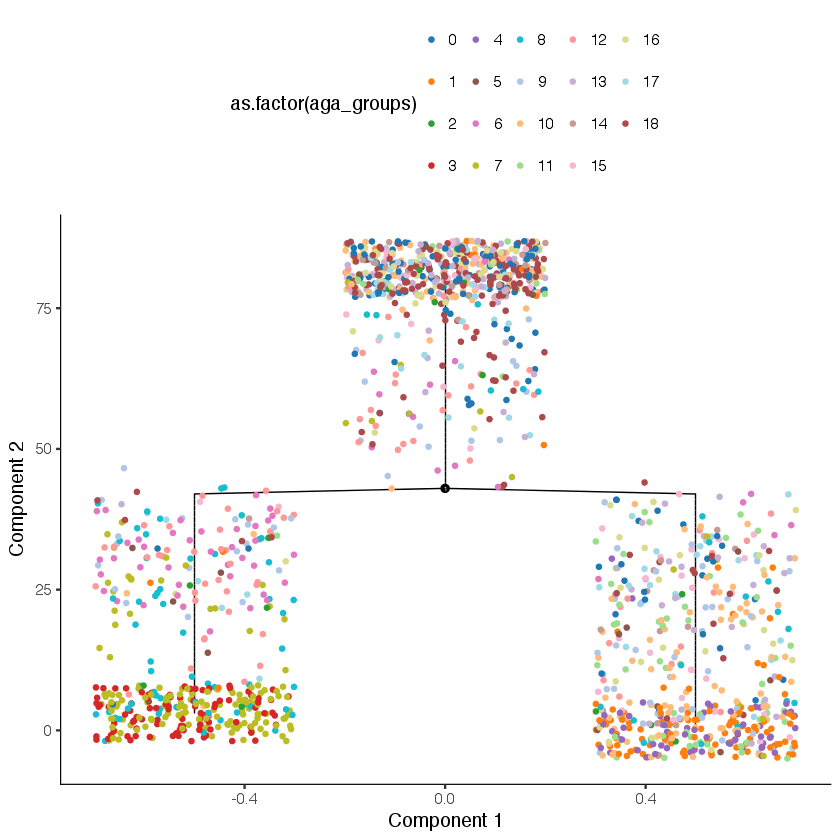

In [21]:
plot_complex_cell_trajectory(cds3, color_by = 'as.factor(aga_groups)', show_branch_points = T,
                             cell_size = 0.8, cell_link_size = 0.3, root_states = c(1)) + scale_color_manual(values = groups_colors)

## Session Info

In [8]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.5

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
 [1] splines   stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] destiny_2.0.8         dplyr_0.7.1           plyr_1.8.4           
 [4] monocle_2.2.0         L1Graph_0.1.0         lpSolveAPI_5.5.2.0-17
 [7] simplePPT_0.1.0       igraph_1.0.1          DDRTree_0.1.5        
[10] irlba_2.2.1           VGAM_1.0-3            ggplot2_2.2.1        
[13] Biobase_2.34.0        BiocGenerics_0.20.0   Matrix_1.2-10        

loaded via a namespace (and not attached):
 [1] nlme_3.1-131           matrixStats_0.52.2     pbkrtest_0.4-7        
 [4] xts_0.9-7              RColorBrewer_1.1-2     repr_0.12.0           
 [7] tools_3.3.2            backports_1.1.0        R6_2.2.2              
[10] rpart_4.1-11           Hmisc